In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajrs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv("dataset/spam.csv", encoding='latin-1')

df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   label    5572 non-null   str  
 1   message  5572 non-null   str  
dtypes: str(2)
memory usage: 87.2 KB


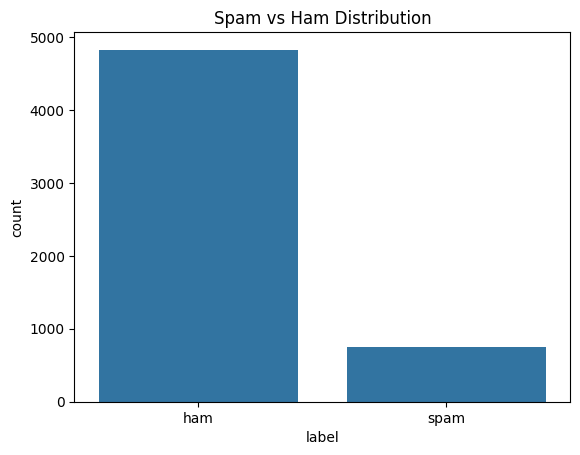

In [6]:
sns.countplot(x=df['label'])
plt.title("Spam vs Ham Distribution")
plt.show()


In [7]:
df['label'] = df['label'].map({'ham':0, 'spam':1})
df.head()


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [9]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [10]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    
    return " ".join(words)

In [11]:
df['clean_message'] = df['message'].apply(clean_text)

df.head()

,label,message,clean_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [12]:
print("Original:\n", df['message'][0])
print("\nCleaned:\n", df['clean_message'][0])

Original:
 Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Cleaned:
 go jurong point crazi avail bugi n great world la e buffet cine got amor wat


In [13]:
X = df['clean_message']
y = df['label']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [16]:
print("Training shape:", X_train_vec.shape)
print("Testing shape:", X_test_vec.shape)

Training shape: (4457, 5566)
Testing shape: (1115, 5566)


In [17]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vec, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [18]:
y_pred = model.predict(X_test_vec)

In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9838565022421525


In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.95      0.93      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



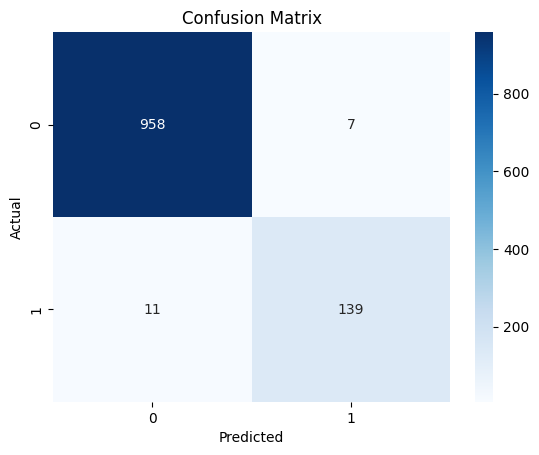

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [22]:
def predict_spam(message):
    cleaned = clean_text(message)
    vectorized = vectorizer.transform([cleaned])
    prediction = model.predict(vectorized)

    return "Spam" if prediction[0] == 1 else "Ham"

In [23]:
predict_spam("Congratulations! You won a free ticket")

'Spam'

In [24]:
predict_spam("Hey bro, are we meeting today?")

'Ham'

In [25]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import joblib

joblib.dump(model, "spam_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']

In [27]:
loaded_model = joblib.load("spam_model.pkl")
loaded_vectorizer = joblib.load("vectorizer.pkl")

In [ ]:
#Conclusion
# The Spam SMS Detection model was successfully developed using Natural Language Processing and Multinomial Naive Bayes algorithm. The model achieved an accuracy of approximately 98.38%, demonstrating strong performance in distinguishing spam and legitimate messages.